# Welcome to WiMLDS!

## About me  🙋

###  💰 Lead Data Scientist at Happy Financial Services - ArthImpact FinServe. 
   - **Micro-lending NBFC** that gives loans to small business owners that lack access to mainstream banking. We're all about     financial inclusion and aim to reach the 6 million Indian that are currently financially marginalised. 
   - Disbursed 21,000 loans amounting to ₹47 Cr and aim to disburse **35,000 loans by the end of Dec 2018.**
   - Build ML models to **reduce default rate** while **increasing acceptance rate.**
    
### 🌞 Renewable Energy:
   - **Proactive failure detection** in solar power plant inverter
   - **Wind power predictions** at a daily, weekly, monthly interval
   - Marketing analytics: 
    - **Gartner ranking:** Top 10 ML startups to watch out for
    - Increased social media interaction by **200%**
    
### 📺 Entertainment:
   - Prepare edge servers to receive valid data from **100,000+ users**
    
### 😍 Other interests:
   - Behavioral Science
   - Development Econ
   - Kbeauty


# How do you build a Data Science project? 🤔

*   **Step 1:** Load packages
*   **Step 2:** Loan & explore the data
*   **Step 3:** Preprocess data & split into train & validation sets
*   **Step 4:** Build the models
*   **Step 5:** Pick the *best* model

## Step 1: Load packages 📚

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import trim_mean, kurtosis
from scipy.stats.mstats import mode, gmean, hmean
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import make_pipeline, FeatureUnion, Pipeline, make_union
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

/home/sahibachopra/miniconda/envs/ai/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


## Step 2: Load & explore the data 📊
- [German Loans Data from UCL Repository](https://archive.ics.uci.edu/ml/datasets/statlog+(german+credit+data)

In [2]:
credit_data = pd.read_csv('/home/sahibachopra/wimlds/data/german_data.csv')

### Let's take a look at the data
- We have some continuous variables:
    - Credit amount
    - Age
    - Duration of Credit (month)
- The rest are categorical

In [3]:
credit_data.describe(include="all").transpose()

,count,mean,std,min,25%,50%,75%,max
Creditability,1000.0,0.700,0.458487,0.0,0.0,1.0,1.00,1.0
Account Balance,1000.0,2.577,1.257638,1.0,1.0,2.0,4.00,4.0
Duration of Credit (month),1000.0,20.903,12.058814,4.0,12.0,18.0,24.00,72.0
Payment Status of Previous Credit,1000.0,2.545,1.083120,0.0,2.0,2.0,4.00,4.0
Purpose,1000.0,2.828,2.744439,0.0,1.0,2.0,3.00,10.0
Credit Amount,1000.0,3271.248,2822.751760,250.0,1365.5,2319.5,3972.25,18424.0
Value Savings/Stocks,1000.0,2.105,1.580023,1.0,1.0,1.0,3.00,5.0
Length of current employment,1000.0,3.384,1.208306,1.0,3.0,3.0,5.00,5.0
Instalment per cent,1000.0,2.973,1.118715,1.0,2.0,3.0,4.00,4.0
Sex & Marital Status,1000.0,2.682,0.708080,1.0,2.0,3.0,3.00,4.0


### Always good to check the structure of the variables
- All integers (numeric) in this dataset
- Need all types to be numeric to run a model

In [4]:
credit_data.dtypes

Creditability                        int64
Account Balance                      int64
Duration of Credit (month)           int64
Payment Status of Previous Credit    int64
Purpose                              int64
Credit Amount                        int64
Value Savings/Stocks                 int64
Length of current employment         int64
Instalment per cent                  int64
Sex & Marital Status                 int64
Guarantors                           int64
Duration in Current address          int64
Most valuable available asset        int64
Age (years)                          int64
Concurrent Credits                   int64
Type of apartment                    int64
No of Credits at this Bank           int64
Occupation                           int64
No of dependents                     int64
Telephone                            int64
Foreign Worker                       int64
dtype: object

### Let's explore the continuous variables
- Credit amount higher for creditable persons
- Younger == more creditable
- Credit duration higher for creditable persons

In [5]:
# get stats of continuous variables

grouped_data = credit_data.groupby('Creditability')
print("Avg Credit Amount Higher for Creditable people:")
print(grouped_data['Credit Amount'].aggregate(np.mean).reset_index())

print(" ")
print("Avg Age Lower for Creditable people:")
print(grouped_data['Age (years)'].aggregate(np.mean).reset_index())


print(" ")
print("Avg Credit Duration Higher for Creditable people:")
print(grouped_data['Duration of Credit (month)'].aggregate(np.mean).reset_index())

Avg Credit Amount Higher for Creditable people:
   Creditability  Credit Amount
0              0    3938.126667
1              1    2985.442857
 
Avg Age Lower for Creditable people:
   Creditability  Age (years)
0              0        33.96
1              1        36.22
 
Avg Credit Duration Higher for Creditable people:
   Creditability  Duration of Credit (month)
0              0                   24.860000
1              1                   19.207143


### Let's visualise the distribution of the continuous variables

/home/sahibachopra/miniconda/envs/ai/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


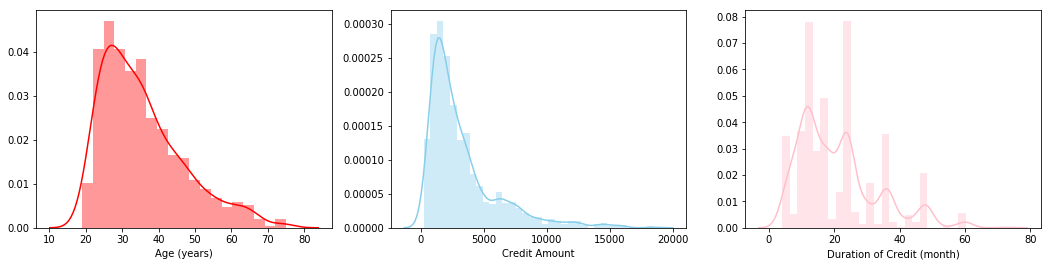

In [6]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 4))
plt = sns.distplot( credit_data["Age (years)"] , color="red", ax=ax1)
plt2 = sns.distplot( credit_data["Credit Amount"] , color="skyblue", ax=ax2)
plt3 = sns.distplot( credit_data["Duration of Credit (month)"] , color="pink",ax=ax3)

### Since the continuous variables are numeric you don't really need to turn them into categorical variables. However, we'll see if splitting them into buckets changes accuracy. 

### We will bucket the continous variables to make them categorical

In [7]:
lb_make = LabelEncoder()

credit_data2 = credit_data.copy()
credit_data2['AgeCat'] = pd.cut(credit_data2['Age (years)'], 4)
credit_data2['AgeCat'] = lb_make.fit_transform(credit_data2["AgeCat"].astype(str))

credit_data2['CredAmtCat'] = pd.cut(credit_data2['Credit Amount'],3)
credit_data2['CredAmtCat'] = lb_make.fit_transform(credit_data2["CredAmtCat"].astype(str))

credit_data2['CredDurCat'] = pd.cut(credit_data2['Duration of Credit (month)'],4)
credit_data2['CredDurCat'] = lb_make.fit_transform(credit_data2["CredDurCat"].astype(str))

In [8]:
credit_data2 = credit_data2.drop(["Age (years)", "Credit Amount", "Duration of Credit (month)"], axis=1)
credit_data2.describe()

,Creditability,Account Balance,Payment Status of Previous Credit,Purpose,Value Savings/Stocks,Length of current employment,Instalment per cent,Sex & Marital Status,Guarantors,Duration in Current address,...,Concurrent Credits,Type of apartment,No of Credits at this Bank,Occupation,No of dependents,Telephone,Foreign Worker,AgeCat,CredAmtCat,CredDurCat
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.700000,2.577000,2.54500,2.828000,2.105000,3.384000,2.973000,2.68200,1.145000,2.845000,...,2.675000,1.928000,1.407000,2.904000,1.155000,1.404000,1.037000,0.673000,1.097000,0.772000
std,0.458487,1.257638,1.08312,2.744439,1.580023,1.208306,1.118715,0.70808,0.477706,1.103718,...,0.705601,0.530186,0.577654,0.653614,0.362086,0.490943,0.188856,0.818988,0.354566,0.637513
min,0.000000,1.000000,0.00000,0.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,2.00000,1.000000,1.000000,3.000000,2.000000,2.00000,1.000000,2.000000,...,3.000000,2.000000,1.000000,3.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000
50%,1.000000,2.000000,2.00000,2.000000,1.000000,3.000000,3.000000,3.00000,1.000000,3.000000,...,3.000000,2.000000,1.000000,3.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000
75%,1.000000,4.000000,4.00000,3.000000,3.000000,5.000000,4.000000,3.00000,1.000000,4.000000,...,3.000000,2.000000,2.000000,3.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,4.000000,4.00000,10.000000,5.000000,5.000000,4.000000,4.00000,3.000000,4.000000,...,3.000000,3.000000,4.000000,4.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000


## Step 3: Split data into train & Validation sets 👯
    - We will be building new features & running the models in an sklearn pipeline 

In [9]:
X = credit_data.loc[:, credit_data.columns != 'Creditability']
y = credit_data["Creditability"]
X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=1/3., random_state=42)

In [10]:
print("Train set dimesions:%f" % X_train.shape[0])
print("Test set dimesions:%f" % X_validation.shape[0])

Train set dimesions:666.000000
Test set dimesions:334.000000


In [11]:
# Split the feature engineering data set

X2 = credit_data2.loc[:, credit_data.columns != 'Creditability']
y2 = credit_data2["Creditability"]
X2_train, X2_validation, y2_train, y2_validation = train_test_split(X, y, test_size=1/3., random_state=42)
print("Train set dimesions:%f" % X2_train.shape[0])
print("Test set dimesions:%f" % X2_validation.shape[0])

Train set dimesions:666.000000
Test set dimesions:334.000000


## Step 4: Build the models 👩‍🔬
- Logistic Regression w/o feature engineering
- Logistic Regression w/ feature engineering
- Random Forest w/o Grid Search 
- Random Forest w/ Grid Search

In [12]:
## function to select the columns

class ColumnSelector(BaseEstimator, TransformerMixin):
    def __init__(self, columns):
        self.columns = columns

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        assert isinstance(X, pd.DataFrame)

        try:
            return X[self.columns]
        except KeyError:
            cols_error = list(set(self.columns) - set(X.columns))
            raise KeyError("The DataFrame does not include the columns: %s" % cols_error)

### Logistic regression w/o feature engineering of continuous variables

In [13]:
pipeline = Pipeline(steps = [
        ("features", make_union(
                ColumnSelector(list(X)),
                )),
                ("model",LogisticRegression(random_state=42))
])

pipeline.fit(X_train, y_train)

pipeline.score(X_validation, y_validation)

0.7335329341317365

### Logistic regression w/ feature engineering of all continuous variables

In [14]:
pipeline = Pipeline(steps = [
        ("features", make_union(
                ColumnSelector(list(X)),
                )),
                ("model",LogisticRegression(random_state=42))
])

pipeline.fit(X2_train, y2_train)

pipeline.score(X2_validation, y2_validation)

0.7335329341317365

### Random Forest w/o feature engineering, w/ and w/o hyper parameter tuning

In [15]:
pipeline = Pipeline(steps = [
        ("features", make_union(
                ColumnSelector(list(X)),
                )),
                ("model",RandomForestClassifier(random_state=42))
])

pipeline.fit(X_train, y_train)

pipeline.score(X_validation, y_validation)

print("RF Score before CV: %s" % pipeline.score(X_validation, y_validation))

# get list of hyperparameters

hyperparameters = { 'model__max_depth': [50, 70,90],
                    'model__min_samples_leaf': [1,2,3]
                  }

clf = GridSearchCV(pipeline, hyperparameters, cv=5)

clf.fit(X_train, y_train)

print("RF Score after CV: %s" % clf.score(X_validation, y_validation))

RF Score before CV: 0.7215568862275449
RF Score after CV: 0.7604790419161677


In [16]:
# here's the list of hyperparameters

print(pipeline.get_params().keys())

dict_keys(['memory', 'steps', 'features', 'model', 'features__n_jobs', 'features__transformer_list', 'features__transformer_weights', 'features__columnselector', 'features__columnselector__columns', 'model__bootstrap', 'model__class_weight', 'model__criterion', 'model__max_depth', 'model__max_features', 'model__max_leaf_nodes', 'model__min_impurity_decrease', 'model__min_impurity_split', 'model__min_samples_leaf', 'model__min_samples_split', 'model__min_weight_fraction_leaf', 'model__n_estimators', 'model__n_jobs', 'model__oob_score', 'model__random_state', 'model__verbose', 'model__warm_start'])


### Random Forest w/ feature engineering, w/ and w/o hyper parameter tuning

In [17]:
pipeline = Pipeline(steps = [
        ("features", make_union(
                ColumnSelector(list(X)),
                )),
                ("model",RandomForestClassifier(random_state=42))
])

pipeline.fit(X2_train, y2_train)

pipeline.score(X2_validation, y2_validation)

print("RF Score before CV: %s" % pipeline.score(X2_validation, y2_validation))

hyperparameters = { 'model__max_depth': [50, 70,90],
                    'model__min_samples_leaf': [1,2,3]
                  }

clf = GridSearchCV(pipeline, hyperparameters, cv=5)

clf.fit(X2_train, y2_train)

print("RF Score after CV: %s" % clf.score(X2_validation, y2_validation))

RF Score before CV: 0.7215568862275449
RF Score after CV: 0.7604790419161677


## Step 5: Pick the best model 🏆
- **Best performing model:** Random Forest with hyperparameter tuning
- **Note:** Bucketing continuous variables to make them categorical did not improve model accuracy

## Next steps 😎

- Tune some more hyperparameters
- Build some other models: gradient boosting, catboost etc
- Create more features by joining 2/2+ variables 

## Resources 📇
- [A Deep Dive Into Sklearn Pipelines](https://www.kaggle.com/baghern/a-deep-dive-into-sklearn-pipelines)
- [Understanding Logistic Regression](https://towardsdatascience.com/understanding-logistic-regression-9b02c2aec102)
- [Random Forest Simple Explanation](https://medium.com/@williamkoehrsen/random-forest-simple-explanation-377895a60d2d)
- [10-fold Cross Validation](https://www.openml.org/a/estimation-procedures/1)
- [Hyperparameters and Tuning Strategies for Random Forest](https://arxiv.org/abs/1804.03515)

# Thank you!! 🐱
- Add me on [LinkedIn](https://www.linkedin.com/in/sahiba-chopra-3762124a/?originalSubdomain=in)
- Find out more about me & my projects on my [blog](https://sahibachopra.com/)
